In [159]:
from scipy.stats import pearsonr,spearmanr
from sklearn.metrics import r2_score
import os
import numpy as np
import logging
from sklearn import tree, linear_model, ensemble
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, ion, show
import seaborn as sbs
from tqdm import tqdm
from sklearn import preprocessing
from scipy.sparse import csr_matrix, lil_matrix
import pandas as pd
from itertools import product
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats
import seaborn as sns

fsize = 12.5
tsize = 12
tdir = 'in'
major = 5.0
minor = 3.0
lwidth = 0.8
lhandle = 2.0
# plt.style.use('default')
plt.style.use('seaborn-colorblind')
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = fsize
plt.rcParams['figure.dpi'] = 100
plt.rcParams['lines.markersize'] = 4
plt.rcParams['legend.fontsize'] = tsize
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = 5.0
plt.rcParams['ytick.minor.size'] = 3.0
plt.rcParams['axes.linewidth'] = lwidth
plt.rcParams['legend.handlelength'] = lhandle
plt.rc("savefig", dpi=600)
plt.rcParams['axes.titley'] = 1.0

nFeaturesList = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99]
ntreesList = [1,2,5,10,20,50,100,200,500,1000]
max_depthList = [1,2,5,10,20,50,100]
min_samples_leafList = [1,2,5,10,20,50,100]

0.60 0.25 0.60
-0.27 -0.18 -0.21
0.43 0.46 0.09
-0.48 -0.48 -0.26


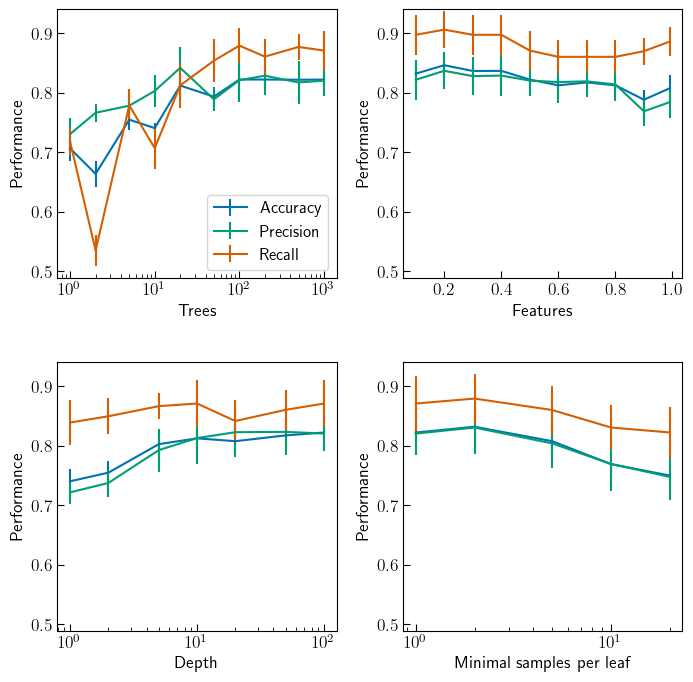

In [123]:
if os.path.isfile("sonarData.csv"):
    sonar = pd.read_csv("sonarData.csv")
else:
    sonar = []
    errors = []
    count = 0

    for ntest,nFeatures, ntrees,max_depth,min_samples_leaf in product(range(5),nFeaturesList,ntreesList,max_depthList,min_samples_leafList):
        try:
            sonar.append(pd.read_csv(f"/hirshblab/data/ofirblumer/MLassignmant/minesVsrocks/newResults/{round(nFeatures*10)}_{ntrees}_{max_depth}_{min_samples_leaf}_{ntest}.csv"))
        except:
            pass
        count += 1
        if count%1000==0 and count>999:
            print(count)
    sonar = pd.concat(sonar,ignore_index=True)
    sonar.to_csv("sonarData.csv")

fig,axs = plt.subplots(2,2,figsize=(7.16,7))
axs = axs.flatten()

data1,data2,data3,data4 = [sonar.loc[sonar.max_depth==100].loc[sonar.min_samples_leaf==1].loc[sonar.nFeatures==0.5],
                           sonar.loc[sonar.max_depth==100].loc[sonar.min_samples_leaf==1].loc[sonar.ntrees==1000],
                           sonar.loc[sonar.nFeatures==0.5].loc[sonar.min_samples_leaf==1].loc[sonar.ntrees==1000],
                           sonar.loc[sonar.nFeatures==0.5].loc[sonar.max_depth==100].loc[sonar.ntrees==1000]]

Rs = []
accuracyImprovement = []
for col, data, name, i in zip(["ntrees","nFeatures","max_depth","min_samples_leaf"],
                                  [data1,data2,data3,data4],
                                  ["Trees","Features","Depth","Minimal samples per leaf"], range(4)):
    Rs.append(abs(spearmanr(data[col],data.accuracy)[0]))
    print(format(float(spearmanr(data[col],data.accuracy)[0]),".2f"),
          format(float(spearmanr(data[col],data.precision)[0]),".2f"),
          format(float(spearmanr(data[col],data.recall)[0]),".2f"))
    data = data.groupby(col).agg({"accuracy":['mean','std'],"alpha":['mean','std'],"precision":['mean','std'],"recall":['mean','std']}).reset_index()
    accuracyImprovement.append(data.accuracy["mean"].max()-data.accuracy["mean"].min())
    axs[i].errorbar(data[col],data.accuracy["mean"],data.accuracy["std"]/np.sqrt(len(data)),label="Accuracy")
    axs[i].errorbar(data[col],data.precision["mean"],data.precision["std"]/np.sqrt(len(data)),label="Precision")
    axs[i].errorbar(data[col],data.recall["mean"],data.recall["std"]/np.sqrt(len(data)),label="Recall")
    axs[i].set_xlabel(name)
    axs[i].set_ylabel("Performance")


axs[0].set_ylim(top=0.94)
for i in range(1,4):
    axs[i].set_ylim(*axs[0].get_ylim())
for i in [0,2,3]:
    axs[i].set_xscale("log")

axs[0].legend()
fig.tight_layout(h_pad=2.5)
plt.savefig("sonar.png")

sonarParamsImportance = pd.DataFrame({"Parameter":["Trees","Features","Depth","MSPL"]+["Trees","Features","Depth","MSPL"],
                                      "val":Rs+accuracyImprovement,"type":[r"$|R|$" for i in range(4)]+["Accuracy" for i in range(4)]})

0.91 0.59 0.90
-0.76 -0.69 -0.62
0.89 0.83 0.42
-0.62 -0.65 -0.59


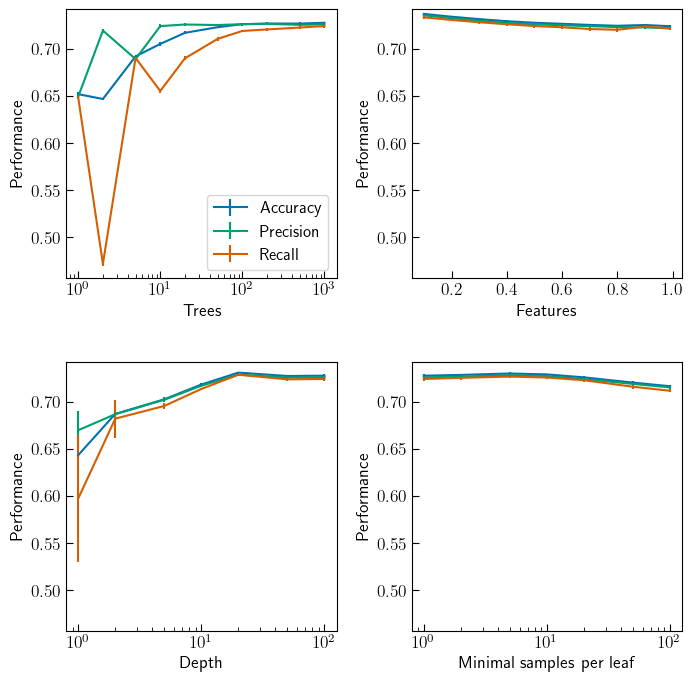

In [135]:
if os.path.isfile("fencingClassData.csv"):
    fencingClass = pd.read_csv("fencingClassData.csv")
else:
    fencing = []
    errors = []
    count = 0
    for ntest,nFeatures, ntrees,max_depth,min_samples_leaf in product(range(5),nFeaturesList,ntreesList,max_depthList,min_samples_leafList):
        try:
            fencing.append(pd.read_csv(f"/hirshblab/data/ofirblumer/MLassignmant/fencing/newResultsClass/{round(nFeatures*10)}_{ntrees}_{max_depth}_{min_samples_leaf}_{ntest}.csv"))
        except:
            pass
        count += 1
        if count%1000==0 and count>999:
            print(count)
    fencingClass = pd.concat(fencing,ignore_index=True)
    fencingClass.to_csv("fencingClassData.csv")

fig,axs = plt.subplots(2,2,figsize=(7.16,7))
axs = axs.flatten()

data1,data2,data3,data4 = [fencingClass.loc[fencingClass.max_depth==100].loc[fencingClass.min_samples_leaf==1].loc[fencingClass.nFeatures==0.5],
                           fencingClass.loc[fencingClass.max_depth==100].loc[fencingClass.min_samples_leaf==1].loc[fencingClass.ntrees==1000],
                           fencingClass.loc[fencingClass.nFeatures==0.5].loc[fencingClass.min_samples_leaf==1].loc[fencingClass.ntrees==1000],
                           fencingClass.loc[fencingClass.nFeatures==0.5].loc[fencingClass.max_depth==100].loc[fencingClass.ntrees==1000]]

Rs = []
accuracyImprovement = []
for col, data, name, i in zip(["ntrees","nFeatures","max_depth","min_samples_leaf"],
                                  [data1,data2,data3,data4],
                                  ["Trees","Features","Depth","Minimal samples per leaf"], range(4)):
    Rs.append(abs(spearmanr(data[col],data.accuracy)[0]))
    print(format(float(spearmanr(data[col],data.accuracy)[0]),".2f"),
          format(float(spearmanr(data[col],data.precision)[0]),".2f"),
          format(float(spearmanr(data[col],data.recall)[0]),".2f"))
    data = data.groupby(col).agg({"accuracy":['mean','std'],"alpha":['mean','std'],"precision":['mean','std'],"recall":['mean','std']}).reset_index()
    accuracyImprovement.append(data.accuracy["mean"].max()-data.accuracy["mean"].min())
    axs[i].errorbar(data[col],data.accuracy["mean"],data.accuracy["std"]/np.sqrt(len(data)),label="Accuracy")
    axs[i].errorbar(data[col],data.precision["mean"],data.precision["std"]/np.sqrt(len(data)),label="Precision")
    axs[i].errorbar(data[col],data.recall["mean"],data.recall["std"]/np.sqrt(len(data)),label="Recall")
    axs[i].set_xlabel(name)
    axs[i].set_ylabel("Performance")

for i in range(1,4):
    axs[i].set_ylim(*axs[0].get_ylim())
for i in [0,2,3]:
    axs[i].set_xscale("log")

axs[0].legend()
fig.tight_layout(h_pad=2.5)
plt.savefig("fencingClass.png")

fencingClassParamsImportance = pd.DataFrame({"Parameter":["Trees","Features","Depth","MSPL"]+["Trees","Features","Depth","MSPL"],
                                      "val":Rs+accuracyImprovement,"type":[r"$|R|$" for i in range(4)]+["Accuracy" for i in range(4)]})

0.94 0.33 0.94
-0.28 -0.10 -0.09
0.95 0.93 0.71
-0.99 -0.97 -0.97


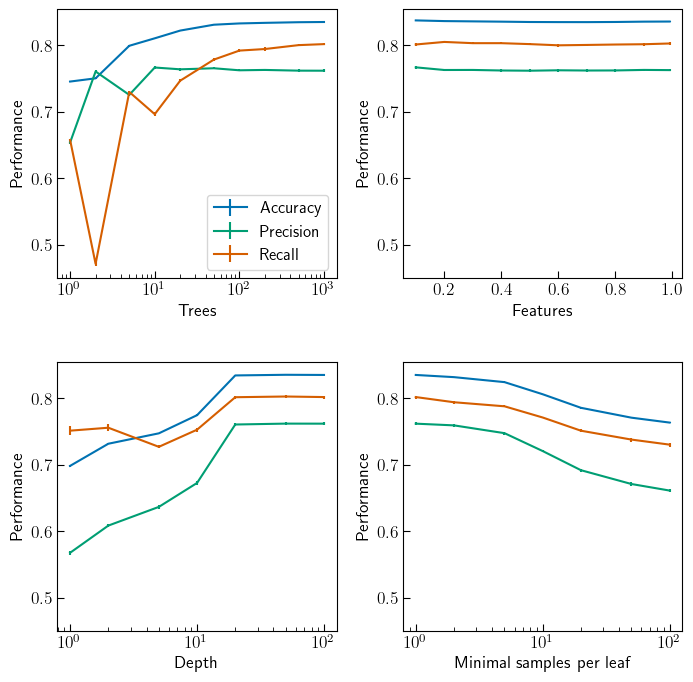

In [162]:
if os.path.isfile("smokingData.csv"):
    smoking = pd.read_csv("smokingData.csv")
else:
    smoking = []
    errors = []
    count = 0
    for ntest,nFeatures, ntrees,max_depth,min_samples_leaf in product(range(5),nFeaturesList,ntreesList,max_depthList,min_samples_leafList):
        try:
            smoking.append(pd.read_csv(f"/hirshblab/data/ofirblumer/MLassignmant/smoking/newResults/{round(nFeatures*10)}_{ntrees}_{max_depth}_{min_samples_leaf}_{ntest}.csv"))
        except:
            pass
        count += 1
    smoking = pd.concat(smoking,ignore_index=True)
    smoking.to_csv("smokingData.csv")

fig,axs = plt.subplots(2,2,figsize=(7.16,7))
axs = axs.flatten()

data1,data2,data3,data4 = [smoking.loc[smoking.max_depth==100].loc[smoking.min_samples_leaf==1].loc[smoking.nFeatures==0.5],
                           smoking.loc[smoking.max_depth==100].loc[smoking.min_samples_leaf==1].loc[smoking.ntrees==1000],
                           smoking.loc[smoking.nFeatures==0.5].loc[smoking.min_samples_leaf==1].loc[smoking.ntrees==1000],
                           smoking.loc[smoking.nFeatures==0.5].loc[smoking.max_depth==100].loc[smoking.ntrees==1000]]

Rs = []
accuracyImprovement = []
for col, data, name, i in zip(["ntrees","nFeatures","max_depth","min_samples_leaf"],
                                  [data1,data2,data3,data4],
                                  ["Trees","Features","Depth","Minimal samples per leaf"], range(4)):
    Rs.append(abs(spearmanr(data[col],data.accuracy)[0]))
    print(format(float(spearmanr(data[col],data.accuracy)[0]),".2f"),
          format(float(spearmanr(data[col],data.precision)[0]),".2f"),
          format(float(spearmanr(data[col],data.recall)[0]),".2f"))
    data = data.groupby(col).agg({"accuracy":['mean','std'],"alpha":['mean','std'],"precision":['mean','std'],"recall":['mean','std']}).reset_index()
    accuracyImprovement.append(data.accuracy["mean"].max()-data.accuracy["mean"].min())
    axs[i].errorbar(data[col],data.accuracy["mean"],data.accuracy["std"]/np.sqrt(len(data)),label="Accuracy")
    axs[i].errorbar(data[col],data.precision["mean"],data.precision["std"]/np.sqrt(len(data)),label="Precision")
    axs[i].errorbar(data[col],data.recall["mean"],data.recall["std"]/np.sqrt(len(data)),label="Recall")
    axs[i].set_xlabel(name)
    axs[i].set_ylabel("Performance")


# axs[0].set_ylim(top=0.94)
for i in range(1,4):
    axs[i].set_ylim(*axs[0].get_ylim())
for i in [0,2,3]:
    axs[i].set_xscale("log")

axs[0].legend()
fig.tight_layout(h_pad=2.5)
plt.savefig("smoking.png")

smokingParamsImportance = pd.DataFrame({"Parameter":["Trees","Features","Depth","MSPL"]+["Trees","Features","Depth","MSPL"],
                                      "val":Rs+accuracyImprovement,"type":[r"$|R|$" for i in range(4)]+["Accuracy" for i in range(4)]})

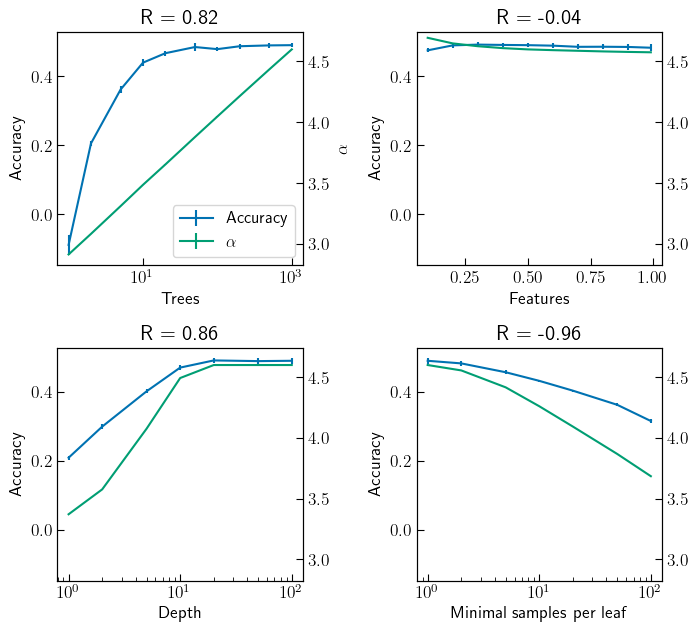

In [126]:
if os.path.isfile("wineData.csv"):
    wine = pd.read_csv("wineData.csv")
else:
    wine = []
    errors = []
    count = 0

    for ntest,nFeatures, ntrees,max_depth,min_samples_leaf in product(range(5),nFeaturesList,ntreesList,max_depthList,min_samples_leafList):
        try:
            wine.append(pd.read_csv(f"/hirshblab/data/ofirblumer/MLassignmant/wine/newResults/{round(nFeatures*10)}_{ntrees}_{max_depth}_{min_samples_leaf}_{ntest}.csv"))
        except:
            pass
        count += 1
        if count%1000==0 and count>999:
            print(count)
    wine = pd.concat(wine,ignore_index=True)
    wine.to_csv("wineData.csv")
    
fig,axs = plt.subplots(2,2,figsize=(7.16,6.5))
axs = axs.flatten()
ax2 = axs[0].twinx()
ax21 = axs[1].twinx()
ax22 = axs[2].twinx()
ax23 = axs[3].twinx()

data1,data2,data3,data4 = [wine.loc[wine.max_depth==100].loc[wine.min_samples_leaf==1].loc[wine.nFeatures==0.5],
                           wine.loc[wine.max_depth==100].loc[wine.min_samples_leaf==1].loc[wine.ntrees==1000],
                           wine.loc[wine.nFeatures==0.5].loc[wine.min_samples_leaf==1].loc[wine.ntrees==1000],
                           wine.loc[wine.nFeatures==0.5].loc[wine.max_depth==100].loc[wine.ntrees==1000]]

Rs = []
accuracyImprovement = []
for col, data, name, ax, i in zip(["ntrees","nFeatures","max_depth","min_samples_leaf"],
                                  [data1,data2,data3,data4],
                                  ["Trees","Features","Depth","Minimal samples per leaf"], [ax2,ax21,ax22,ax23], range(4)):
    Rs.append(abs(spearmanr(data[col],data.accuracy)[0]))
    axs[i].set_title(f"R = {format(spearmanr(data[col],data.accuracy)[0], '.2f')}")
    data = data.groupby(col).agg({"accuracy":['mean','std'],"alpha":['mean','std']}).reset_index()
    accuracyImprovement.append(data.accuracy["mean"].max()-data.accuracy["mean"].min())
    axs[i].errorbar(data[col],data.accuracy["mean"],data.accuracy["std"]/np.sqrt(len(data)),label="Accuracy")
    ax.errorbar(data[col],data.alpha["mean"],data.alpha["std"]/np.sqrt(len(data)),c="#009E73",label=r"$\alpha$")
    axs[i].set_xlabel(name)
    axs[i].set_ylabel("Accuracy")
    ax2.set_ylabel(r"$\alpha$")

axs[0].set_ylim(*axs[0].get_ylim())
axs[0].errorbar(1,4,2,c="#009E73",label=r"$\alpha$")
ax2.set_ylim(top=4.74)
for i,ax in zip(range(1,4),[ax21,ax22,ax23]):
    axs[i].set_ylim(*axs[0].get_ylim())
    ax.set_ylim(*ax2.get_ylim())
for i in [0,2,3]:
    axs[i].set_xscale("log")

axs[0].legend()
fig.tight_layout()
plt.savefig("wine.png")

wineParamsImportance = pd.DataFrame({"Parameter":["Trees","Features","Depth","MSPL"]+["Trees","Features","Depth","MSPL"],
                                      "val":Rs+accuracyImprovement,"type":[r"$|R|$" for i in range(4)]+["Accuracy" for i in range(4)]})

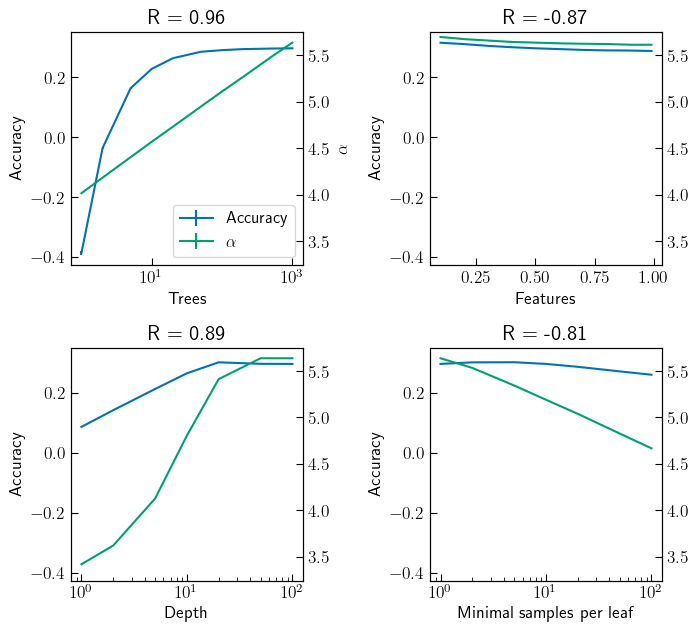

In [127]:
if os.path.isfile("fencingRegData.csv"):
    fencingReg = pd.read_csv("fencingRegData.csv")
else:
    fencing = []
    errors = []
    count = 0
    for ntest,nFeatures, ntrees,max_depth,min_samples_leaf in product(range(5),nFeaturesList,ntreesList,max_depthList,min_samples_leafList):
        try:
            fencing.append(pd.read_csv(f"/hirshblab/data/ofirblumer/MLassignmant/fencing/newResultsReg/{round(nFeatures*10)}_{ntrees}_{max_depth}_{min_samples_leaf}_{ntest}.csv"))
        except:
            pass
        count += 1
        if count%1000==0 and count>999:
            print(count)
    fencingReg = pd.concat(fencing,ignore_index=True)
    fencingReg.to_csv("fencingRegData.csv")

fig,axs = plt.subplots(2,2,figsize=(7.16,6.5))
axs = axs.flatten()
ax2 = axs[0].twinx()
ax21 = axs[1].twinx()
ax22 = axs[2].twinx()
ax23 = axs[3].twinx()
data1,data2,data3,data4 = [fencingReg.loc[fencingReg.max_depth==100].loc[fencingReg.min_samples_leaf==1].loc[fencingReg.nFeatures==0.5],
                           fencingReg.loc[fencingReg.max_depth==100].loc[fencingReg.min_samples_leaf==1].loc[fencingReg.ntrees==1000],
                           fencingReg.loc[fencingReg.nFeatures==0.5].loc[fencingReg.min_samples_leaf==1].loc[fencingReg.ntrees==1000],
                           fencingReg.loc[fencingReg.nFeatures==0.5].loc[fencingReg.max_depth==100].loc[fencingReg.ntrees==1000]]

Rs = []
accuracyImprovement = []
for col, data, name, ax, i in zip(["ntrees","nFeatures","max_depth","min_samples_leaf"],
                                  [data1,data2,data3,data4],
                                  ["Trees","Features","Depth","Minimal samples per leaf"], [ax2,ax21,ax22,ax23], range(4)):
    Rs.append(abs(spearmanr(data[col],data.accuracy)[0]))
    axs[i].set_title(f"R = {format(spearmanr(data[col],data.accuracy)[0], '.2f')}")
    data = data.groupby(col).agg({"accuracy":['mean','std'],"alpha":['mean','std']}).reset_index()
    accuracyImprovement.append(data.accuracy["mean"].max()-data.accuracy["mean"].min())
    axs[i].errorbar(data[col],data.accuracy["mean"],data.accuracy["std"]/np.sqrt(len(data)),label="Accuracy")
    ax.errorbar(data[col],data.alpha["mean"],data.alpha["std"]/np.sqrt(len(data)),c="#009E73",label=r"$\alpha$")
    axs[i].set_xlabel(name)
    axs[i].set_ylabel("Accuracy")
    ax2.set_ylabel(r"$\alpha$")

axs[0].set_ylim(top = 0.35)
ax2.set_ylim(top = 5.75)

axs[0].errorbar(1,10,2,c="#009E73",label=r"$\alpha$")
ax2.set_ylim(3.24)
for i,ax in zip(range(1,4),[ax21,ax22,ax23]):
    axs[i].set_ylim(*axs[0].get_ylim())
    ax.set_ylim(*ax2.get_ylim())
for i in [0,2,3]:
    axs[i].set_xscale("log")

axs[0].legend()
fig.tight_layout()
plt.savefig("fencingReg.png")

fencingRegParamsImportance = pd.DataFrame({"Parameter":["Trees","Features","Depth","MSPL"]+["Trees","Features","Depth","MSPL"],
                                      "val":Rs+accuracyImprovement,"type":[r"$|R|$" for i in range(4)]+["Accuracy" for i in range(4)]})

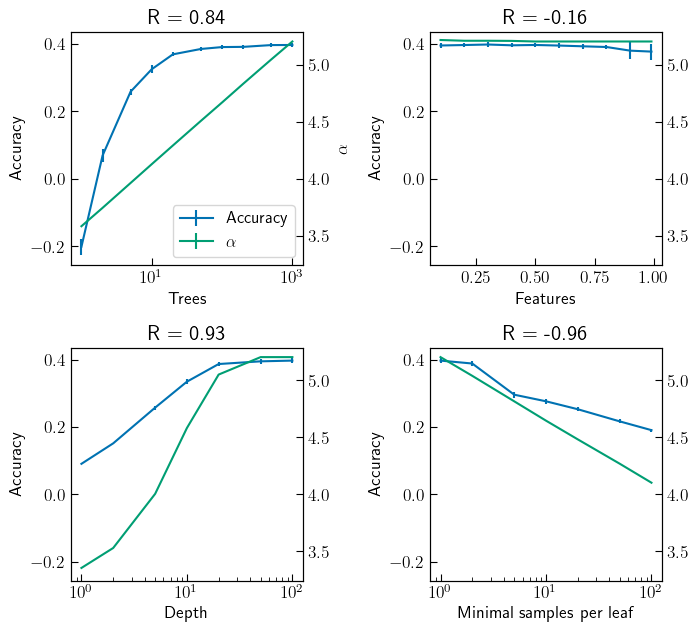

In [128]:
if os.path.isfile("booksData.csv"):
    books = pd.read_csv("booksData.csv")
else:
    books = []
    errors = []
    count = 0

    for ntest,nFeatures, ntrees,max_depth,min_samples_leaf in product(range(5),nFeaturesList,ntreesList,max_depthList,min_samples_leafList):
        try:
            books.append(pd.read_csv(f"/hirshblab/data/ofirblumer/MLassignmant/books/newResults/{round(nFeatures*10)}_{ntrees}_{max_depth}_{min_samples_leaf}_{ntest}.csv"))
        except:
            pass
        count += 1
        if count%1000==0 and count>999:
            print(count)
    books = pd.concat(books,ignore_index=True)
    books.to_csv("booksData.csv")

fig,axs = plt.subplots(2,2,figsize=(7.16,6.5))
axs = axs.flatten()
ax2 = axs[0].twinx()
ax21 = axs[1].twinx()
ax22 = axs[2].twinx()
ax23 = axs[3].twinx()
data1,data2,data3,data4 = [books.loc[books.max_depth==100].loc[books.min_samples_leaf==1].loc[books.nFeatures==0.5],
                           books.loc[books.max_depth==100].loc[books.min_samples_leaf==1].loc[books.ntrees==1000],
                           books.loc[books.nFeatures==0.5].loc[books.min_samples_leaf==1].loc[books.ntrees==1000],
                           books.loc[books.nFeatures==0.5].loc[books.max_depth==100].loc[books.ntrees==1000]]

Rs = []
accuracyImprovement = []
for col, data, name, ax, i in zip(["ntrees","nFeatures","max_depth","min_samples_leaf"],
                                  [data1,data2,data3,data4],
                                  ["Trees","Features","Depth","Minimal samples per leaf"], [ax2,ax21,ax22,ax23], range(4)):
    Rs.append(abs(spearmanr(data[col],data.accuracy)[0]))
    axs[i].set_title(f"R = {format(spearmanr(data[col],data.accuracy)[0], '.2f')}")
    data = data.groupby(col).agg({"accuracy":['mean','std'],"alpha":['mean','std']}).reset_index()
    accuracyImprovement.append(data.accuracy["mean"].max()-data.accuracy["mean"].min())
    axs[i].errorbar(data[col],data.accuracy["mean"],data.accuracy["std"]/np.sqrt(len(data)),label="Accuracy")
    ax.errorbar(data[col],data.alpha["mean"],data.alpha["std"]/np.sqrt(len(data)),c="#009E73",label=r"$\alpha$")
    axs[i].set_xlabel(name)
    axs[i].set_ylabel("Accuracy")
    ax2.set_ylabel(r"$\alpha$")

axs[0].set_ylim(*axs[0].get_ylim())
axs[0].errorbar(1,10,2,c="#009E73",label=r"$\alpha$")
ax2.set_ylim(3.24)
for i,ax in zip(range(1,4),[ax21,ax22,ax23]):
    axs[i].set_ylim(*axs[0].get_ylim())
    ax.set_ylim(*ax2.get_ylim())
for i in [0,2,3]:
    axs[i].set_xscale("log")

axs[0].legend()
fig.tight_layout()
plt.savefig("books.png")

booksParamsImportance = pd.DataFrame({"Parameter":["Trees","Features","Depth","MSPL"]+["Trees","Features","Depth","MSPL"],
                                      "val":Rs+accuracyImprovement,"type":[r"$|R|$" for i in range(4)]+["Accuracy" for i in range(4)]})

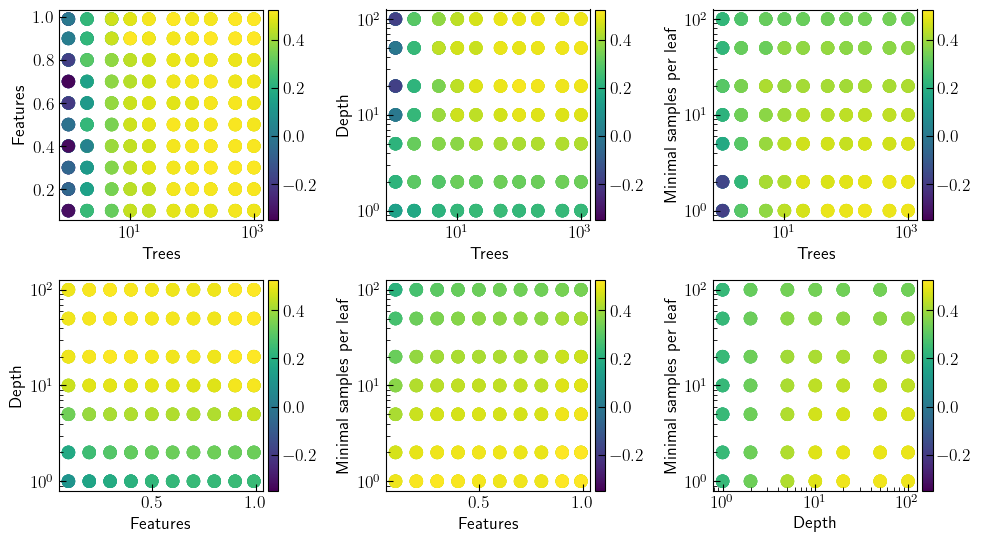

In [129]:
fig, axs = plt.subplots(2,3,figsize=(10,5.6))
axs = axs.flatten()
data = wine

for i, dataForPlot, XY, names in zip(range(6),[data.loc[data.min_samples_leaf==1].loc[data.max_depth==100],
                                               data.loc[data.min_samples_leaf==1].loc[data.nFeatures==0.8],
                                               data.loc[data.max_depth==100].loc[data.nFeatures==0.8],
                                               data.loc[data.min_samples_leaf==1].loc[data.ntrees==1000],
                                               data.loc[data.max_depth==100].loc[data.ntrees==1000],
                                               data.loc[data.nFeatures==0.8].loc[data.ntrees==1000]],
                                     [["ntrees","nFeatures"],["ntrees","max_depth"],["ntrees","min_samples_leaf"],
                                      ["nFeatures","max_depth"],["nFeatures","min_samples_leaf"],["max_depth","min_samples_leaf"]],
                                     [["Trees","Features"],["Trees","Depth"],["Trees","Minimal samples per leaf"],
                                      ["Features","Depth"],["Features","Minimal samples per leaf"],["Depth","Minimal samples per leaf"]]):
    im = axs[i].scatter(dataForPlot[XY[0]],dataForPlot[XY[1]],c=dataForPlot.accuracy,s=75,vmax=0.525,vmin=-0.35)
    divider = make_axes_locatable(axs[i])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')#,ticks=[0,2,4,6]
    axs[i].set_xlabel(names[0])
    axs[i].set_ylabel(names[1])

for i in [0,1,2,5]:
    axs[i].set_xscale("log")
for i in range(1,6):
    axs[i].set_yscale("log")
fig.tight_layout()
plt.savefig("2Dexample.png")

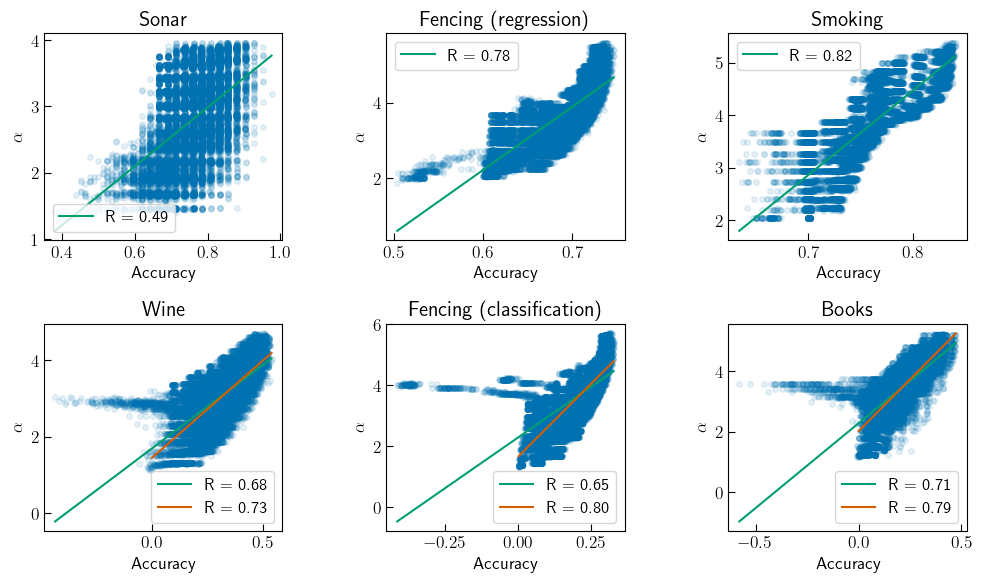

In [163]:
fig,axs = plt.subplots(2,3,figsize=(10,6))
axs = axs.flatten()
for i, data, name in zip(range(6),[sonar,fencingClass,smoking,wine,fencingReg,books],["Sonar","Fencing (regression)","Smoking","Wine","Fencing (classification)","Books"]):
    axs[i].plot(data.accuracy,data.alpha,"o",alpha=0.1)
    fit = stats.linregress(data.accuracy,data.alpha)
    x = np.array([data.accuracy.min(),data.accuracy.max()])
    axs[i].plot(x,x*fit[0]+fit[1],label=f"R = {format(fit[2], '.2f')}")
    fit = stats.linregress(data.loc[data.accuracy>0].accuracy,data.loc[data.accuracy>0].alpha)
    if i > 2:
        x = np.array([data.loc[data.accuracy>0].accuracy.min(),data.accuracy.max()])
        axs[i].plot(x,x*fit[0]+fit[1],label=f"R = {format(fit[2], '.2f')}")
    axs[i].legend()
    axs[i].set_xlabel("Accuracy")
    axs[i].set_ylabel(r"$\alpha$")
    axs[i].set_title(name)
fig.tight_layout(w_pad=3.5)
plt.savefig("alphaCheckAll.png")

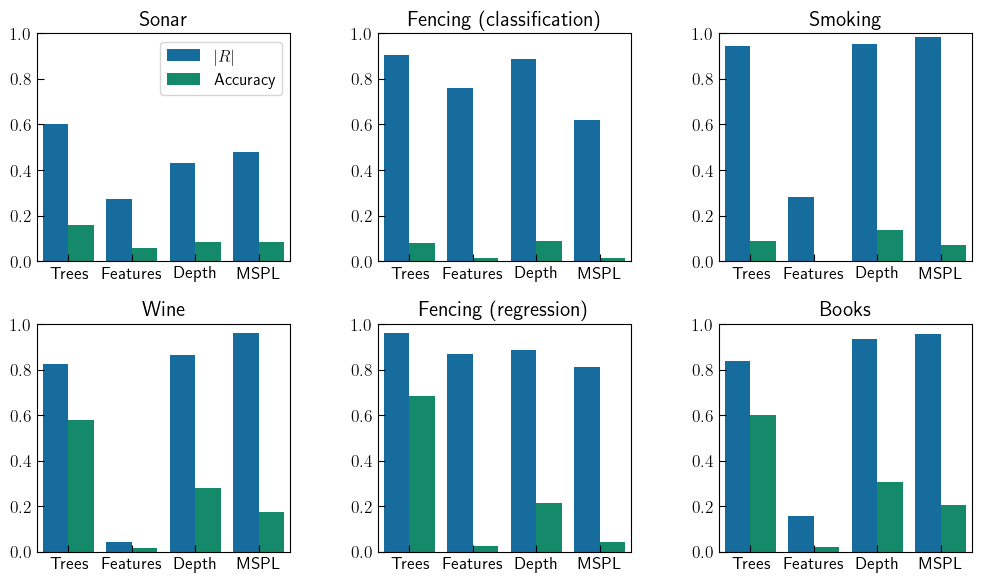

In [164]:
fig,axs = plt.subplots(2,3,figsize=(10,6))
axs = axs.flatten()
for i, data, name in zip(range(6),
                         [sonarParamsImportance,fencingClassParamsImportance,smokingParamsImportance,wineParamsImportance,fencingRegParamsImportance,booksParamsImportance],
                         ["Sonar","Fencing (classification)","Smoking","Wine","Fencing (regression)","Books"]):
    sns.barplot(data=data,x="Parameter",y="val",hue="type",ax=axs[i])
    axs[i].set_ylabel("")
    axs[i].set_xlabel("")
    if i==0:
        axs[i].legend(title="")
    else:
        axs[i].legend([], [], frameon=False)
    axs[i].set_title(name)
    axs[i].set_ylim(0,1)

fig.tight_layout(w_pad=3.5)
plt.savefig("parametersAll.png")